In [3]:
from src.python.getMatrix import getMatrixByName, getMatrixes
from src.python.visMat import visMat
from src.python.visGraph import visGraph

import networkx as nx
import numpy as np
import scipy.sparse
import time

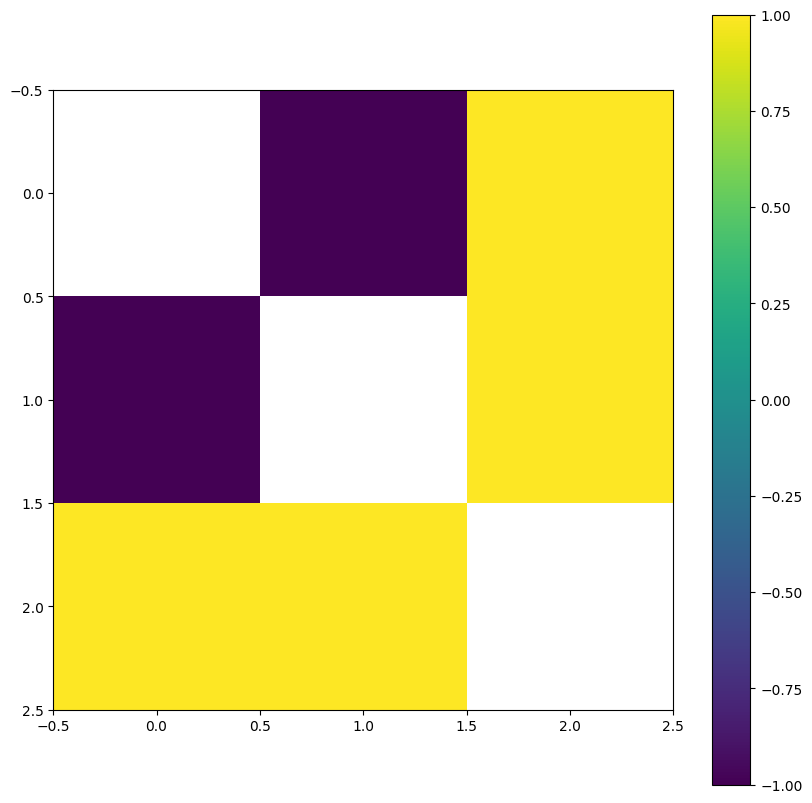

start: spring_layout


ImportError: cannot import name '_process_params' from 'networkx.drawing' (c:\Users\hirok\Documents\University\FruchtermanReingoldByRandomSubspace\.venv\lib\site-packages\networkx\drawing\__init__.py)

In [11]:
mat = np.array([[0, -1, 1], [-1, 0, 1], [1, 1, 0]])

visMat(mat)

G = nx.Graph(mat)
print("start: spring_layout")
t0 = time.perf_counter()

if True:
    from networkx.drawing import _process_params

    center = None
    dim = 2
    G, center = _process_params(G, center, dim)

    pos_arr = None
    dom_size = 1

    A = nx.to_numpy_array(G, weight="weight")
    print(A)


pos = nx.spring_layout(G, iterations=50)
# pos = nx.kamada_kawai_layout(G, iterations=50)
pos = nx.spectral_layout(G)
t1 = time.perf_counter()
print("end: spring_layout in", t1 - t0, "[sec]")

visGraph(G, pos)

(936, 936) 6264 float64 1.0 1.0


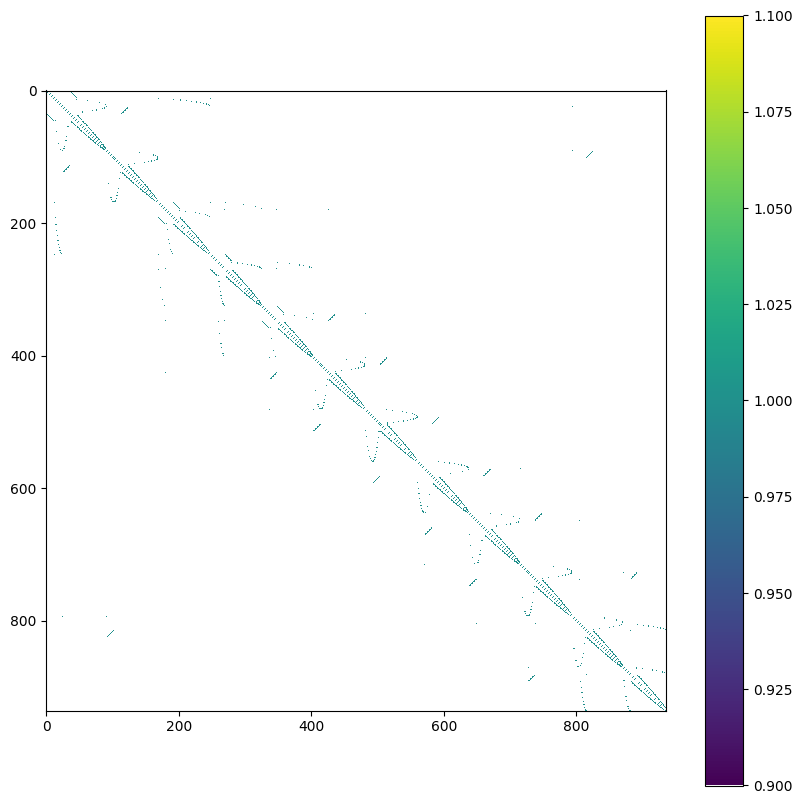

start: spring_layout
end: spring_layout in 13.59770149999531 [sec]


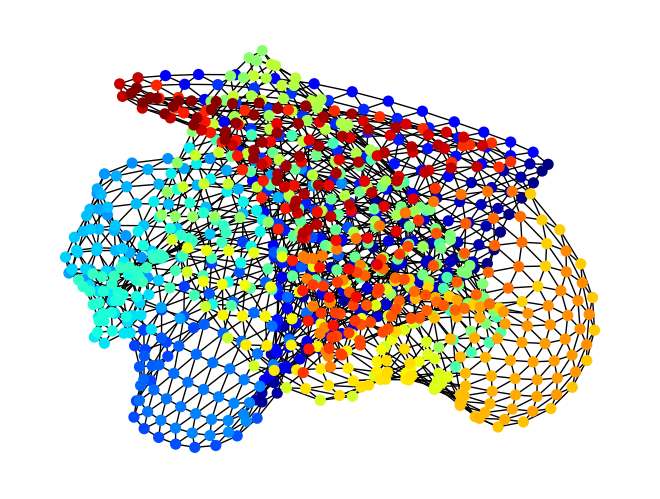

In [4]:
# for mat in getMatrixes(asDense=False):
if True:
    mat = getMatrixByName("jagmesh1")
    print(mat.shape, mat.nnz, mat.dtype, np.min(mat.data), np.max(mat.data))

    if scipy.sparse.issparse(mat):
        mat.setdiag(0)
        mat.eliminate_zeros()
        mat.data = np.abs(mat.data)
    else:
        mat[np.diag_indices_from(mat)] = 0
        mat.data = np.abs(mat.data)

    visMat(mat)

    G = nx.Graph(mat)
    print("start: spring_layout")
    t0 = time.perf_counter()
    pos = nx.spring_layout(G, iterations=50)
    # pos = nx.kamada_kawai_layout(G, iterations=50)
    # pos = nx.spectral_layout(G)
    t1 = time.perf_counter()
    print("end: spring_layout in", t1 - t0, "[sec]")

    visGraph(G, pos)

    # break